# Task 01: Predict Student Percentage 

# Import

In [88]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [44]:
arr = s_data.to_numpy()
print(arr)
np.mean(s_data, axis=0)

[[ 2.5 21. ]
 [ 5.1 47. ]
 [ 3.2 27. ]
 [ 8.5 75. ]
 [ 3.5 30. ]
 [ 1.5 20. ]
 [ 9.2 88. ]
 [ 5.5 60. ]
 [ 8.3 81. ]
 [ 2.7 25. ]
 [ 7.7 85. ]
 [ 5.9 62. ]
 [ 4.5 41. ]
 [ 3.3 42. ]
 [ 1.1 17. ]
 [ 8.9 95. ]
 [ 2.5 30. ]
 [ 1.9 24. ]
 [ 6.1 67. ]
 [ 7.4 69. ]
 [ 2.7 30. ]
 [ 4.8 54. ]
 [ 3.8 35. ]
 [ 6.9 76. ]
 [ 7.8 86. ]]


Hours      5.012
Scores    51.480
dtype: float64

In [90]:
np.median(s_data, axis=0)
stats.mode(s_data, axis=0)

ModeResult(mode=array([[ 2.5, 30. ]]), count=array([[2, 3]]))

In [ ]:
# Bivariate Analysis

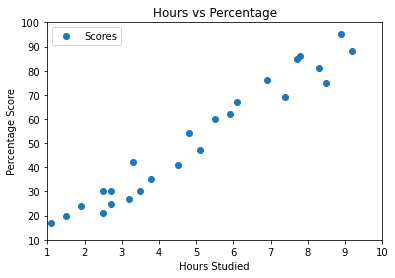

In [91]:
# Plotting the distribution of scores using matplotlib libray of Python- style decides the layout of the plot-simple scatter plot
s_data.plot(x='Hours',y='Scores', style="o")
plt.title('Hours vs Percentage')  
plt.axis([1,10,10,100])
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Data Preparation

In [92]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [93]:
print (X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [94]:
print (y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [95]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [96]:
print(X_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [97]:
print (X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Training the algorithm

In [98]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


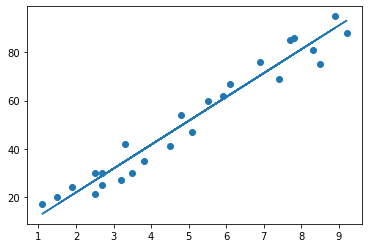

In [99]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predictions

In [100]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [101]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [102]:
hours = [[9.5]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.5]]
Predicted Score = 96.16939660753593


# Model Evaluation

In [103]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
